# Fashion-MNIST 辨識

![alt text](https://github.com/margaretmz/deep-learning/blob/master/images/modern%20dl_fash-mnist_keras.png?raw=1)

In [58]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() 
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [59]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [60]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [62]:
# 將非0的數字轉為1，顯示第1張圖片
data = x_train[3].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(str(data[i])))
text_image

['[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0

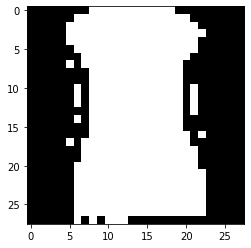

In [4]:
# 將非0的數字轉為1
img_index=3
data = x_train[img_index].copy()
data[data>0] = 1
plt.imshow(data, cmap='gray')

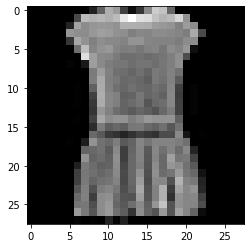

In [5]:
img_index=3
plt.imshow(x_train[img_index], cmap='gray')

In [6]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [35]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
# model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1568)             

In [36]:
# Param #
(1 * (2 * 2) + 1) * 64, (64 * (2 * 2) + 1) * 32

(320, 8224)

In [37]:
model.compile(loss='CategoricalCrossentropy', # loss='mse', 'CategoricalCrossentropy'
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
# Method 1
# x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
# x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

# Method 2
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


In [11]:
from keras.utils import np_utils # 用來後續將 label 標籤轉為 one-hot-encoding  

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
y_train.shape

(60000, 10)

## Dataset 1: No ImageDataGenerator

In [13]:
60000 * (1 - 0.2) / 1000

48.0

In [19]:
history = model.fit(x_train,
                    y_train,
                    batch_size=1000,
                    epochs=50,
                    validation_split=0.2)

Epoch 1/50
48/48 [==============================] - 2s 26ms/step - loss: 1.1104 - accuracy: 0.5868 - val_loss: 0.6422 - val_accuracy: 0.7649
Epoch 2/50
48/48 [==============================] - 1s 24ms/step - loss: 0.6194 - accuracy: 0.7684 - val_loss: 0.4958 - val_accuracy: 0.8202
Epoch 3/50
48/48 [==============================] - 1s 24ms/step - loss: 0.5218 - accuracy: 0.8093 - val_loss: 0.4447 - val_accuracy: 0.8418
Epoch 4/50
48/48 [==============================] - 1s 24ms/step - loss: 0.4735 - accuracy: 0.8270 - val_loss: 0.4136 - val_accuracy: 0.8481
Epoch 5/50
48/48 [==============================] - 1s 24ms/step - loss: 0.4440 - accuracy: 0.8393 - val_loss: 0.3810 - val_accuracy: 0.8622
Epoch 6/50
48/48 [==============================] - 1s 24ms/step - loss: 0.4236 - accuracy: 0.8462 - val_loss: 0.3584 - val_accuracy: 0.8712
Epoch 7/50
48/48 [==============================] - 1s 24ms/step - loss: 0.4025 - accuracy: 0.8541 - val_loss: 0.3457 - val_accuracy: 0.8763
Epoch 8/50
48

## Dataset 2: With ImageDataGenerator

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=10,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             validation_split=0.2) # Add validation_split -> subset='training' or 'validation'

history = model.fit(datagen.flow(x_train, y_train, batch_size=2000, subset='training'),
                    epochs=200,
                    validation_data=datagen.flow(x_train, y_train, batch_size=250, subset='validation'))

Epoch 1/50
24/24 [==============================] - 10s 412ms/step - loss: 0.3594 - accuracy: 0.8670 - val_loss: 0.2880 - val_accuracy: 0.8962
Epoch 2/50
24/24 [==============================] - 10s 411ms/step - loss: 0.3601 - accuracy: 0.8668 - val_loss: 0.2871 - val_accuracy: 0.8975
Epoch 3/50
24/24 [==============================] - 10s 408ms/step - loss: 0.3618 - accuracy: 0.8667 - val_loss: 0.2791 - val_accuracy: 0.8982
Epoch 4/50
24/24 [==============================] - 10s 411ms/step - loss: 0.3582 - accuracy: 0.8674 - val_loss: 0.2875 - val_accuracy: 0.8891
Epoch 5/50
24/24 [==============================] - 10s 435ms/step - loss: 0.3624 - accuracy: 0.8649 - val_loss: 0.2861 - val_accuracy: 0.8942
Epoch 6/50
24/24 [==============================] - 11s 451ms/step - loss: 0.3545 - accuracy: 0.8684 - val_loss: 0.2820 - val_accuracy: 0.8947
Epoch 7/50
24/24 [==============================] - 11s 458ms/step - loss: 0.3613 - accuracy: 0.8677 - val_loss: 0.2835 - val_accuracy: 0.8926

In [50]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=2) # verbose=0, 1, 2
# Print test accuracy
print('\n', f'Test accuracy: {score[1]:.3f}')

313/313 - 1s - loss: 0.2574 - accuracy: 0.9092

 Test accuracy: 0.909


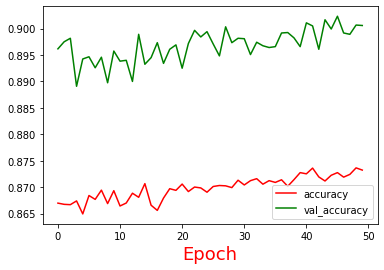

In [51]:
plt.plot(history.history['accuracy'], 'r', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'g', label = 'val_accuracy')
plt.xlabel('Epoch', fontdict={'c': 'r', 'size': 18})
plt.legend(loc='lower right')

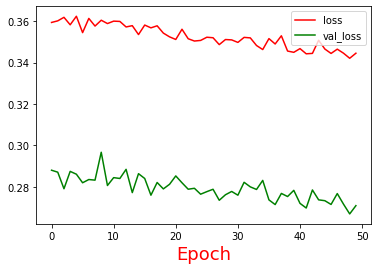

In [52]:
plt.plot(history.history['loss'], 'r', label = 'loss')
plt.plot(history.history['val_loss'], 'g', label = 'val_loss')
plt.xlabel('Epoch', fontdict={'c': 'r', 'size': 18})
plt.legend(loc='upper right')

In [53]:
# 安裝 openCV
# pip install opencv-python
import os
import cv2
import numpy as np

my_path='./test_data/'
num_imgs = len(os.listdir(my_path))
print(num_imgs)
new_data = np.empty([int(num_imgs),28,28,1]) # in which to put the images
for i,image in enumerate(os.listdir(my_path)):
    print(image)
    the_img = cv2.imread(os.path.join(my_path, image), cv2.IMREAD_GRAYSCALE)
    the_img = cv2.resize(the_img,(28,28))
    the_img = (255-the_img) / 255 # 反白，因白色為0，黑色為255
    new_data[i] = the_img.reshape(28, 28, -1)

7
bag1.jpg
pant1.jpg
Sandal1.jpg
Sandal2.jpg
shirt1.jpg
t-shirt.jpg
trouser.jpg


In [54]:
label_dict = {0: 'T-shirt/top', 
              1:'Trouser',
              2:'Pullover', 
              3:'Dress', 
              4:'Coat',
              5:'Sandal', 
              6:'Shirt', 
              7:'Sneaker', 
              8:'Bag', 
              9:'Ankle boot'}

In [55]:
# model.predict_classes(new_data)
import numpy as np
np.argmax(model.predict(new_data), axis=1)

array([8, 1, 5, 5, 6, 0, 1], dtype=int64)

In [56]:
# [label_dict[k] for k in model.predict_classes(new_data)]
[label_dict[k] for k in np.argmax(model.predict(new_data), axis=1)]

['Bag', 'Trouser', 'Sandal', 'Sandal', 'Shirt', 'T-shirt/top', 'Trouser']